In [1]:
#Mengimpor pustaka yang digunakan untuk analisis, preprocessing data, pembuatan model, visualisasi, evaluasi performa, dan penyimpanan model.
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

In [2]:
#Membaca dataset dari file CSV realistic_alzheimer_dataset_updated.csv menggunakan pandas.
df = pd.read_csv('/content/sample_data/realistic_alzheimer_dataset_updated.csv')

In [3]:
#Menggunakan fungsi df.head() untuk menampilkan 5 baris pertama dataset agar dapat melihat data secara sekilas.
df.head()

,Age,Gender,Education Level,Job,Physical Activity,Diet Quality,Family History,BMI,Smoking,Alcohol Consumption,...,Reading Habit,Pollution Exposure,Memory Difficulty New Information,Memory Difficulty Recent Events,Focus Loss Frequency,Repetitive Questions,Difficulty Following Instructions,Word Forgetting,Confusion Frequency,Alzheimer Risk
0,69,Perempuan,Magister,Pekerja kantoran,Rendah,Buruk,Tidak,28.8,Ya,Tidak pernah,...,Sangat Jarang,Sedang,2,1,4,1,3,4,5,Direkomendasikan ke Dokter
1,63,Perempuan,Tidak Sekolah,Pekerja kantoran,Sedang,Normal,Ya,26.1,Ya,Kadang,...,Sering,Sedang,2,0,1,1,1,5,3,Direkomendasikan ke Dokter
2,71,Laki,Sarjana,Pekerja Profesional,Sedang,Normal,Ya,27.5,Tidak,Tidak pernah,...,Sangat Jarang,Tinggi,1,4,1,3,5,1,4,Direkomendasikan ke Dokter
3,80,Perempuan,SMA,Pekerja kantoran,Sedang,Baik,Ya,40.0,Tidak,Kadang,...,Kadang-kadang,Sedang,1,1,5,1,3,1,1,Tidak Terdeteksi
4,62,Perempuan,SMA,Pensiunan,Rendah,Buruk,Ya,18.5,Ya,Tidak pernah,...,Sangat Jarang,Tinggi,3,1,5,2,0,2,2,Direkomendasikan ke Dokter


In [4]:
#Menampilkan tipe data, jumlah record, nama kolom, dan jumlah data non-null di setiap kolom menggunakan df.info().
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       500 non-null    int64  
 1   Gender                                    500 non-null    object 
 2   Education Level                           500 non-null    object 
 3   Job                                       500 non-null    object 
 4   Physical Activity                         500 non-null    object 
 5   Diet Quality                              500 non-null    object 
 6   Family History                            500 non-null    object 
 7   BMI                                       500 non-null    float64
 8   Smoking                                   500 non-null    object 
 9   Alcohol Consumption                       500 non-null    object 
 10  Sleep Duration (hours)                

In [5]:
#Menggunakan value_counts() untuk mengetahui jumlah tiap kategori di kolom Alzheimer Risk.
df['Alzheimer Risk'].value_counts()

,count
Alzheimer Risk,
Direkomendasikan ke Dokter,386
Tidak Terdeteksi,114


In [6]:
#Menggunakan isnull().sum() untuk mengecek apakah ada nilai yang kosong di dataset.
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job,0
Physical Activity,0
Diet Quality,0
Family History,0
BMI,0
Smoking,0
Alcohol Consumption,0


In [7]:
#Menggunakan duplicated().sum() untuk mengecek dan menghitung jumlah baris yang terduplikasi.
df.duplicated().sum()

0

In [8]:
#Mengehapus kolom yang tidak terpakai menggunakan drop()
df.drop(columns=['Hydration (glasses/day)','Omega-3 Intake Frequency (times/week)'],inplace=True)

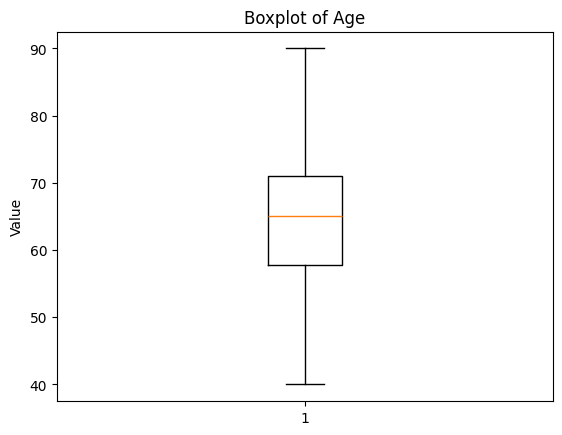

In [9]:
#Membuat boxplot untuk fitur Age menggunakan matplotlib. Berguna untuk mendeteksi keberadaan outlier.
feature = 'Age'
plt.boxplot(df[feature])
plt.title(f"Boxplot of {feature}")
plt.ylabel('Value')
plt.show()

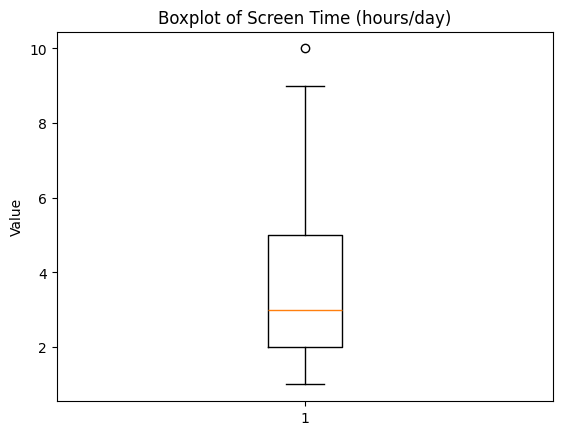

In [10]:
#Membuat boxplot untuk fitur Screen Time (hours/day) menggunakan matplotlib. Berguna untuk mendeteksi keberadaan outlier.
feature = "Screen Time (hours/day)"
plt.boxplot(df[feature])
plt.title(f"Boxplot of {feature}")
plt.ylabel('Value')
plt.show()

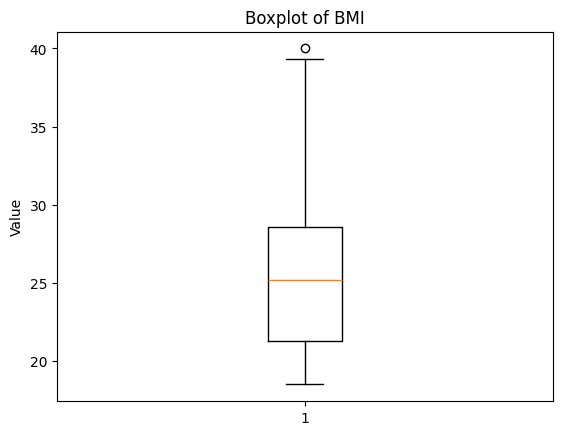

In [11]:
#Membuat boxplot untuk fitur BMI menggunakan matplotlib. Berguna untuk mendeteksi keberadaan outlier.
feature = "BMI"
plt.boxplot(df[feature])
plt.title(f"Boxplot of {feature}")
plt.ylabel('Value')
plt.show()

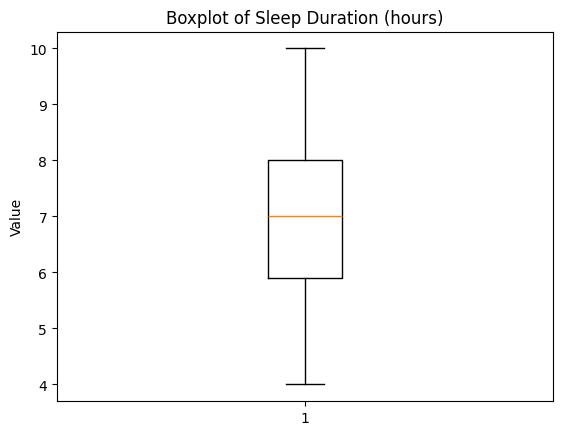

In [12]:
#Membuat boxplot untuk fitur Sleep Duration (hours) menggunakan matplotlib. Berguna untuk mendeteksi keberadaan outlier.
feature = "Sleep Duration (hours)"
plt.boxplot(df[feature])
plt.title(f"Boxplot of {feature}")
plt.ylabel('Value')
plt.show()

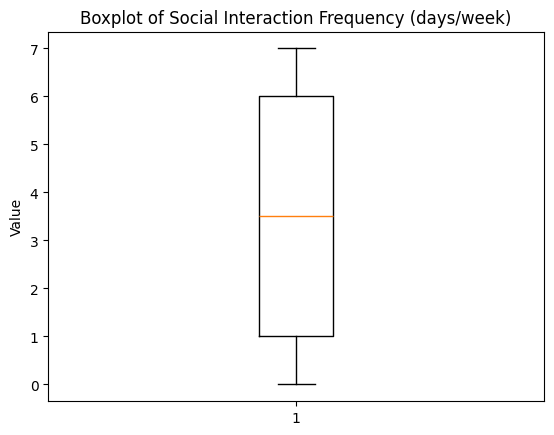

In [13]:
#Membuat boxplot untuk fitur Social Interaction Frequency (days/week) menggunakan matplotlib. Berguna untuk mendeteksi keberadaan outlier.
feature = 'Social Interaction Frequency (days/week)'
plt.boxplot(df[feature])
plt.title(f"Boxplot of {feature}")
plt.ylabel('Value')
plt.show()

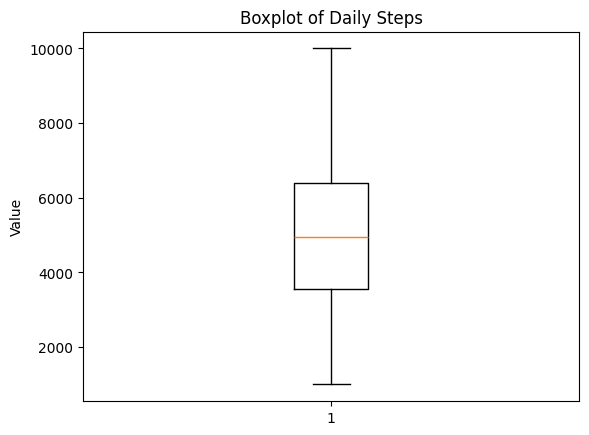

In [14]:
#Membuat boxplot untuk fitur Daily Steps menggunakan matplotlib. Berguna untuk mendeteksi keberadaan outlier.
feature = 'Daily Steps'
plt.boxplot(df[feature])
plt.title(f"Boxplot of {feature}")
plt.ylabel('Value')
plt.show()

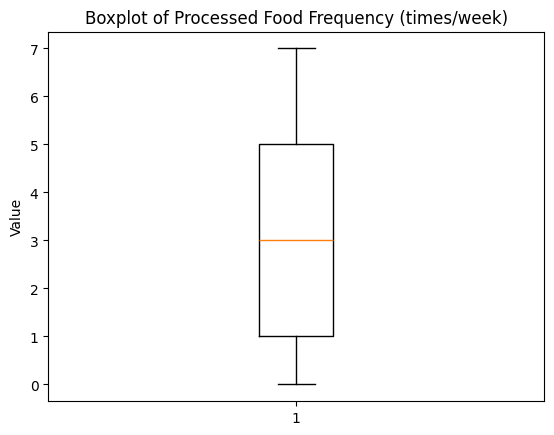

In [15]:
#Membuat boxplot untuk fitur Processed Food Frequency (times/week) menggunakan matplotlib. Berguna untuk mendeteksi keberadaan outlier.
feature = "Processed Food Frequency (times/week)"
plt.boxplot(df[feature])
plt.title(f"Boxplot of {feature}")
plt.ylabel('Value')
plt.show()

In [16]:
#Melihat deskripsi dari data
df.describe()

,Age,BMI,Sleep Duration (hours),Social Interaction Frequency (days/week),Screen Time (hours/day),Daily Steps,Processed Food Frequency (times/week),Memory Difficulty New Information,Memory Difficulty Recent Events,Focus Loss Frequency,Repetitive Questions,Difficulty Following Instructions,Word Forgetting,Confusion Frequency
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,64.520000,25.212200,6.914200,3.474000,3.518000,4999.426000,3.434000,2.472000,2.500000,2.448000,2.580000,2.494000,2.484000,2.424000
std,9.648616,4.699511,1.446209,2.333284,1.950714,2049.168492,2.279482,1.688466,1.683945,1.780347,1.687987,1.719266,1.750392,1.661851
min,40.000000,18.500000,4.000000,0.000000,1.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.750000,21.300000,5.900000,1.000000,2.000000,3545.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,65.000000,25.200000,7.000000,3.500000,3.000000,4947.500000,3.000000,3.000000,3.000000,2.000000,3.000000,2.500000,2.000000,2.000000
75%,71.000000,28.600000,8.000000,6.000000,5.000000,6402.250000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,90.000000,40.000000,10.000000,7.000000,10.000000,10000.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [17]:
#Menghapus outlier pada BMI dan Screen Time. Dengan cara:
#1. Menghitung nilai Z-score untuk fitur BMI dan Screen Time.
#2. Menambahkan kolom Z-score ke dataset.
#3. Memfilter data berdasarkan Z-score dengan ambang batas (threshold) ±3 untuk menghapus outlier.

from scipy.stats import zscore
# Menghitung Z-score untuk beberapa fitur
features = ["BMI",
            "Screen Time (hours/day)"
            ]

z_scores = df[features].apply(zscore)

# Menambahkan kolom Z-score ke DataFrame asli
df_zscore = df.copy()
for feature in features:
    df_zscore[f'{feature}_zscore'] = z_scores[feature]

df_zscore

# Memfilter data tanpa outlier berdasarkan Z-score
threshold = 3
df_no_outlier = df[(z_scores.abs() < threshold).all(axis=1)]

print("\nData tanpa outlier berdasarkan Z-score:")
df_no_outlier


Data tanpa outlier berdasarkan Z-score:


,Age,Gender,Education Level,Job,Physical Activity,Diet Quality,Family History,BMI,Smoking,Alcohol Consumption,...,Reading Habit,Pollution Exposure,Memory Difficulty New Information,Memory Difficulty Recent Events,Focus Loss Frequency,Repetitive Questions,Difficulty Following Instructions,Word Forgetting,Confusion Frequency,Alzheimer Risk
0,69,Perempuan,Magister,Pekerja kantoran,Rendah,Buruk,Tidak,28.8,Ya,Tidak pernah,...,Sangat Jarang,Sedang,2,1,4,1,3,4,5,Direkomendasikan ke Dokter
1,63,Perempuan,Tidak Sekolah,Pekerja kantoran,Sedang,Normal,Ya,26.1,Ya,Kadang,...,Sering,Sedang,2,0,1,1,1,5,3,Direkomendasikan ke Dokter
2,71,Laki,Sarjana,Pekerja Profesional,Sedang,Normal,Ya,27.5,Tidak,Tidak pernah,...,Sangat Jarang,Tinggi,1,4,1,3,5,1,4,Direkomendasikan ke Dokter
4,62,Perempuan,SMA,Pensiunan,Rendah,Buruk,Ya,18.5,Ya,Tidak pernah,...,Sangat Jarang,Tinggi,3,1,5,2,0,2,2,Direkomendasikan ke Dokter
5,62,Laki,Sarjana,Pekerja kantoran,Tinggi,Normal,Ya,33.6,Tidak,Tidak pernah,...,Sering,Rendah,5,1,1,5,0,5,1,Direkomendasikan ke Dokter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,70,Perempuan,SMA,Pensiunan,Rendah,Normal,Ya,25.4,Tidak,Tidak pernah,...,Sangat Jarang,Sedang,5,0,2,5,0,2,1,Direkomendasikan ke Dokter
496,54,Perempuan,Tidak Sekolah,Kuli,Sedang,Normal,Ya,29.3,Ya,Tidak pernah,...,Kadang-kadang,Rendah,5,0,0,3,5,4,4,Direkomendasikan ke Dokter
497,63,Perempuan,Magister,Kuli,Rendah,Normal,Ya,25.7,Ya,Tidak pernah,...,Sering,Sedang,2,2,2,3,2,3,4,Direkomendasikan ke Dokter
498,56,Laki,SMA,Kuli,Tinggi,Baik,Ya,18.5,Ya,Kadang,...,Kadang-kadang,Rendah,0,0,5,2,5,0,1,Tidak Terdeteksi


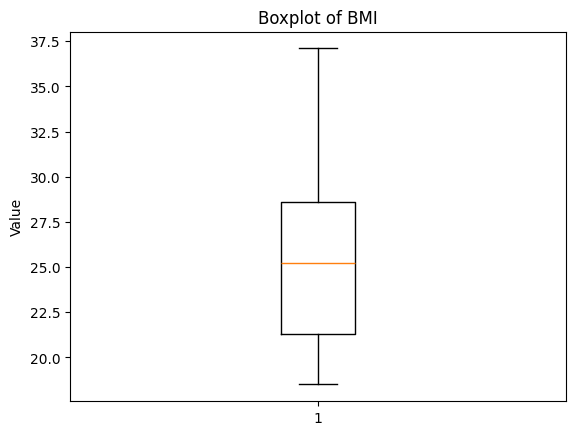

In [18]:
#Kolom BMI setelah hapus outlier
feature = "BMI"
plt.boxplot(df_no_outlier[feature])
plt.title(f"Boxplot of {feature}")
plt.ylabel('Value')
plt.show()

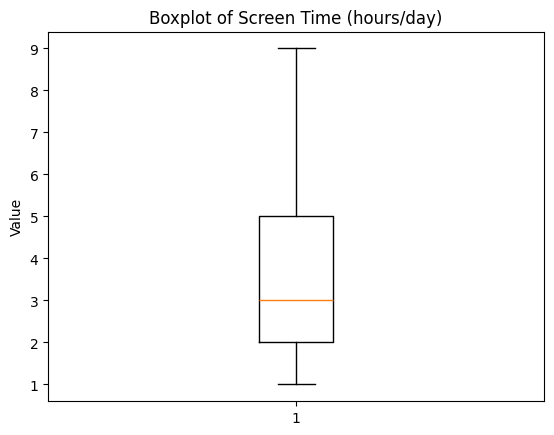

In [19]:
#Kolom Screen Time setelah hapus outlier
feature = "Screen Time (hours/day)"
plt.boxplot(df_no_outlier[feature])
plt.title(f"Boxplot of {feature}")
plt.ylabel('Value')
plt.show()

In [20]:
#Melakukan standardisasi menggunakan StandardScaler untuk memastikan fitur-fitur memiliki skala yang sama.
scaler = StandardScaler()
df_no_outlier[['Daily Steps','BMI','Age']] = scaler.fit_transform(df_no_outlier[['Daily Steps','BMI','Age']])

<ipython-input-20-f1c6f5f5fc60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier[['Daily Steps','BMI','Age']] = scaler.fit_transform(df_no_outlier[['Daily Steps','BMI','Age']])


In [21]:
df_no_outlier.head()

,Age,Gender,Education Level,Job,Physical Activity,Diet Quality,Family History,BMI,Smoking,Alcohol Consumption,...,Reading Habit,Pollution Exposure,Memory Difficulty New Information,Memory Difficulty Recent Events,Focus Loss Frequency,Repetitive Questions,Difficulty Following Instructions,Word Forgetting,Confusion Frequency,Alzheimer Risk
0,0.473760,Perempuan,Magister,Pekerja kantoran,Rendah,Buruk,Tidak,0.796060,Ya,Tidak pernah,...,Sangat Jarang,Sedang,2,1,4,1,3,4,5,Direkomendasikan ke Dokter
1,-0.151352,Perempuan,Tidak Sekolah,Pekerja kantoran,Sedang,Normal,Ya,0.209345,Ya,Kadang,...,Sering,Sedang,2,0,1,1,1,5,3,Direkomendasikan ke Dokter
2,0.682131,Laki,Sarjana,Pekerja Profesional,Sedang,Normal,Ya,0.513568,Tidak,Tidak pernah,...,Sangat Jarang,Tinggi,1,4,1,3,5,1,4,Direkomendasikan ke Dokter
4,-0.255537,Perempuan,SMA,Pensiunan,Rendah,Buruk,Ya,-1.442152,Ya,Tidak pernah,...,Sangat Jarang,Tinggi,3,1,5,2,0,2,2,Direkomendasikan ke Dokter
5,-0.255537,Laki,Sarjana,Pekerja kantoran,Tinggi,Normal,Ya,1.839111,Tidak,Tidak pernah,...,Sering,Rendah,5,1,1,5,0,5,1,Direkomendasikan ke Dokter


In [22]:
#Menggunakan LabelEncoder untuk mengonversi kolom-kolom kategorikal menjadi nilai numerik, sehingga dapat digunakan oleh algoritma machine learning.
df_sklearn_encoded = df_no_outlier.copy()
categorical_columns = ['Gender', 'Alcohol Consumption', 'Education Level', 'Family History',
                      'Diet Quality', 'Physical Activity', 'Job',
                     'Smoking', 'Stress Level', 'Cognitive Exercise','Pollution Exposure','Reading Habit','Smoking Habit','Sleep Quality']
df_sklearn_encoded[categorical_columns] = df_sklearn_encoded[categorical_columns].apply(lambda col: LabelEncoder().fit_transform(col))

In [23]:
#Menampilkan hasil encoded Menggunakan fungsi df.head() untuk menampilkan 5 baris pertama dataset agar dapat melihat data secara sekilas.
df_sklearn_encoded.head()

,Age,Gender,Education Level,Job,Physical Activity,Diet Quality,Family History,BMI,Smoking,Alcohol Consumption,...,Reading Habit,Pollution Exposure,Memory Difficulty New Information,Memory Difficulty Recent Events,Focus Loss Frequency,Repetitive Questions,Difficulty Following Instructions,Word Forgetting,Confusion Frequency,Alzheimer Risk
0,0.473760,1,1,2,0,1,0,0.796060,1,2,...,1,1,2,1,4,1,3,4,5,Direkomendasikan ke Dokter
1,-0.151352,1,4,2,1,2,1,0.209345,1,0,...,2,1,2,0,1,1,1,5,3,Direkomendasikan ke Dokter
2,0.682131,0,3,1,1,2,1,0.513568,0,2,...,1,2,1,4,1,3,5,1,4,Direkomendasikan ke Dokter
4,-0.255537,1,2,3,0,1,1,-1.442152,1,2,...,1,2,3,1,5,2,0,2,2,Direkomendasikan ke Dokter
5,-0.255537,0,3,2,2,2,1,1.839111,0,2,...,2,0,5,1,1,5,0,5,1,Direkomendasikan ke Dokter


In [24]:
#Mengonversi nilai pada kolom Alzheimer Risk menjadi numerik:
#Direkomendasikan ke Dokter :1
#Tidak Terdeteksi :0

df_sklearn_encoded['Alzheimer Risk'] = df_sklearn_encoded['Alzheimer Risk'].map({'Direkomendasikan ke Dokter':1,'Tidak Terdeteksi':0})

In [25]:
#Menampilkan tipe data, jumlah record, nama kolom, dan jumlah data non-null di setiap kolom menggunakan df.info().
df_sklearn_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 499
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       497 non-null    float64
 1   Gender                                    497 non-null    int64  
 2   Education Level                           497 non-null    int64  
 3   Job                                       497 non-null    int64  
 4   Physical Activity                         497 non-null    int64  
 5   Diet Quality                              497 non-null    int64  
 6   Family History                            497 non-null    int64  
 7   BMI                                       497 non-null    float64
 8   Smoking                                   497 non-null    int64  
 9   Alcohol Consumption                       497 non-null    int64  
 10  Sleep Duration (hours)                    4

In [26]:
#Menampilkan informasi dari data untuk memastikan semua kolom bertipe numerik
df_sklearn_encoded.head()

,Age,Gender,Education Level,Job,Physical Activity,Diet Quality,Family History,BMI,Smoking,Alcohol Consumption,...,Reading Habit,Pollution Exposure,Memory Difficulty New Information,Memory Difficulty Recent Events,Focus Loss Frequency,Repetitive Questions,Difficulty Following Instructions,Word Forgetting,Confusion Frequency,Alzheimer Risk
0,0.473760,1,1,2,0,1,0,0.796060,1,2,...,1,1,2,1,4,1,3,4,5,1
1,-0.151352,1,4,2,1,2,1,0.209345,1,0,...,2,1,2,0,1,1,1,5,3,1
2,0.682131,0,3,1,1,2,1,0.513568,0,2,...,1,2,1,4,1,3,5,1,4,1
4,-0.255537,1,2,3,0,1,1,-1.442152,1,2,...,1,2,3,1,5,2,0,2,2,1
5,-0.255537,0,3,2,2,2,1,1.839111,0,2,...,2,0,5,1,1,5,0,5,1,1


Text(0.5, 1.0, 'Correlation Heatmap')

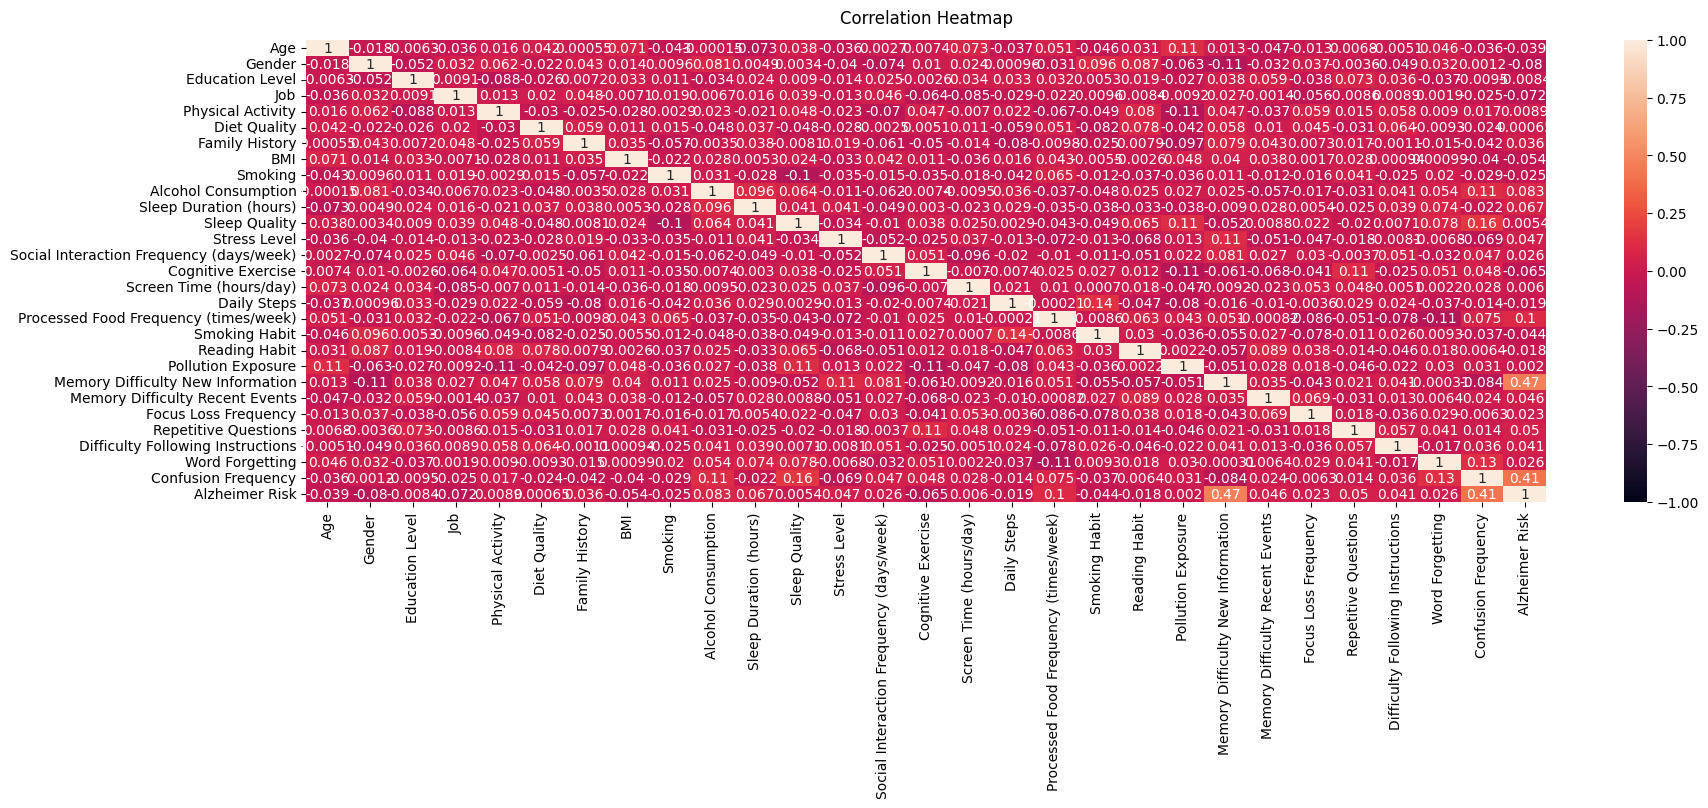

In [27]:
#Membuat peta korelasi antara semua fitur menggunakan seaborn.heatmap. Ini membantu memahami hubungan antara variabel dalam dataset.
plt.figure(figsize=(20,6))
heatmap = sns.heatmap(df_sklearn_encoded.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':12}, pad=12)

In [28]:
#Memisahkan dataset menjadi:
#x: Semua kolom kecuali Alzheimer Risk.
#y: Kolom Alzheimer Risk.
x= df_sklearn_encoded.drop(columns=['Alzheimer Risk'])
y= df_sklearn_encoded['Alzheimer Risk']

In [29]:
#Menggunakan metode Recursive Feature Elimination (RFE) dengan algoritma Random Forest.
#untuk memilih 14 fitur terbaik berdasarkan kepentingan.
#Menampilkan fitur-fitur yang dipilih untuk pelatihan model.

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=14)
fit = rfe.fit(x, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

selected_features = x.columns[rfe.support_]
x_selected = x[selected_features]

selected_features

Num Features: 14
Selected Features: [ True False False  True False False False  True False False  True False
 False  True False  True  True  True False False False  True False  True
  True  True  True  True]
Feature Ranking: [ 1 15  5  1  8  6 13  1 14  7  1  9  4  1  3  1  1  1 10 12 11  1  2  1
  1  1  1  1]


Index(['Age', 'Job', 'BMI', 'Sleep Duration (hours)',
       'Social Interaction Frequency (days/week)', 'Screen Time (hours/day)',
       'Daily Steps', 'Processed Food Frequency (times/week)',
       'Memory Difficulty New Information', 'Focus Loss Frequency',
       'Repetitive Questions', 'Difficulty Following Instructions',
       'Word Forgetting', 'Confusion Frequency'],
      dtype='object')

In [30]:
#Membagi dataset menjadi data latih (x_train, y_train) dan data uji (x_test, y_test) dengan rasio 70:30 menggunakan train_test_split.
x_train,x_test,y_train,y_test = train_test_split(x_selected,y,test_size=0.3,random_state=14)

In [31]:
#Melatih model Random Forest dengan data latih (x_train dan y_train).
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
#Membuat prediksi pada data latih dan uji.
#Menghitung metrik evaluasi: akurasi, presisi, recall, F1-score, dan confusion matrix.

train_prediction = rf_model.predict(x_train)
test_prediction = rf_model.predict(x_test)

akurasi = accuracy_score(y_train,train_prediction)
print(f'Nilai akurasi saat pelatihan: {akurasi}')
akurasi = accuracy_score(y_test,test_prediction)
print(f'Nilai akurasi saat test: {akurasi}')
presisi = precision_score(y_test,test_prediction)
print(f'nilai presisi: {presisi}')
recall = recall_score(y_test,test_prediction)
print(f'nilai recall: {recall}')
f1s = f1_score(y_test,test_prediction)
print(f'nilai F1: {f1s}')
cm = confusion_matrix(y_test,test_prediction)
print(cm)

Nilai akurasi saat pelatihan: 1.0
Nilai akurasi saat test: 0.98
nilai presisi: 1.0
nilai recall: 0.9732142857142857
nilai F1: 0.9864253393665159
[[ 38   0]
 [  3 109]]


In [33]:
from sklearn.model_selection import cross_val_score

# Melakukan cross-validation menggunakan 20 fold untuk mengukur kinerja model secara lebih konsisten. Menampilkan rata-rata akurasi dan standar deviasi.
cv_scores = cross_val_score(rf_model, x_selected, y, cv=20, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})")

Cross-Validation Accuracy: 0.99 (+/- 0.017320508075688787)


In [34]:
#import fitur dataset
kolom = df_sklearn_encoded.columns
pickle.dump(kolom,open('kolom.pkl','wb'))

In [35]:
#Model Random Fores
with open('/content/RFModel.pkl','wb') as file:
  pickle.dump(rf_model,file)